In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
sample_a = pd.read_csv('/Users/artemmoskvin/Documents/Data-Science/Data/ab_test-redesign_sample_a.csv')
sample_b = pd.read_csv('/Users/artemmoskvin/Documents/Data-Science/Data/ab_test-redesign_sample_b.csv')

In [32]:
sample_a['date'] = pd.to_datetime(sample_a['date'], format='%Y-%m-%d')
sample_b['date'] = pd.to_datetime(sample_b['date'], format='%Y-%m-%d')

In [9]:
sample_a['group'] = 'A'
sample_b['group'] = 'B'
a_b = pd.concat([sample_a, sample_b])

In [10]:
converted_a_b = a_b.groupby('group')['transactions', 'cid'].agg('sum')

/var/folders/bp/7q01yp0929dcj5gt3hpd87tc0000gn/T/ipykernel_5413/4273044866.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  converted_a_b = a_b.groupby('group')['transactions', 'cid'].agg('sum')


In [11]:
converted_a_b

,transactions,cid
group,,
A,441,6.637395e+13
B,463,6.613246e+13


In [21]:
from statsmodels.stats.proportion import proportions_ztest
# нулевая и альтернативная гипотезы
H0 = 'Конверсии в группах А и B равны'
H1 = 'Конверсия в группе А меньше, чем конверсия в группе B'
alpha = 0.1 # уровень значимости
# вычисляем значение p-value для z-теста для пропорций
_, p_value = proportions_ztest(
    count=converted_a_b['transactions'], #число "успехов"
    nobs=converted_a_b['cid'], #общее число наблюдений
    alternative='smaller',
)
# выводим результат на экран
print('p-value: ', round(p_value, 2))
# сравниваем полученное p-value с уровнем значимости
if (p_value < alpha): 
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))

p-value:  0.22
Принимаем нулевую гипотезу. Конверсии в группах А и B равны


In [34]:
sample_data_a = sample_a.groupby(['date']).agg({
    'cid':'count',
    'transactions':'sum',
    'revenue': 'sum'
}).reset_index().rename(columns={'cid': 'Количество посетителей', 'transactions': 'Количество транзакций', 'revenue': 'Сумма покупок'})
sample_data_a.head()

,date,Количество посетителей,Количество транзакций,Сумма покупок
0,2020-11-06,2576,16,1577279
1,2020-11-07,2704,23,1721886
2,2020-11-08,3354,25,846051
3,2020-11-09,3234,18,708830
4,2020-11-10,3022,29,826984


In [35]:
sample_data_b = sample_b.groupby(['date']).agg({
    'cid':'count',
    'transactions':'sum',
    'revenue': 'sum'
}).reset_index().rename(columns={'cid': 'Количество посетителей', 'transactions': 'Количество транзакций', 'revenue': 'Сумма покупок'})
sample_data_b.head()

,date,Количество посетителей,Количество транзакций,Сумма покупок
0,2020-11-06,2499,19,996645
1,2020-11-07,2804,19,555499
2,2020-11-08,3291,24,3044842
3,2020-11-09,3062,25,1285836
4,2020-11-10,3072,30,2414726


In [74]:
sample_data_a[(sample_data_a['date'] == '2020-11-08')]

,date,Количество посетителей,Количество транзакций,Сумма покупок
2,2020-11-08,3354,25,846051


In [36]:
sample_data_a.loc[:, 'Коммулятивное количество посетителей'] = sample_data_a['Количество посетителей'].cumsum()
sample_data_a.loc[:, 'Коммулятивное количество транзакций'] = sample_data_a['Количество транзакций'].cumsum()
sample_data_a.loc[:, 'Коммулятивная сумма покупок'] = sample_data_a['Сумма покупок'].cumsum()

In [37]:
sample_data_b.loc[:, 'Коммулятивное количество посетителей'] = sample_data_b['Количество посетителей'].cumsum()
sample_data_b.loc[:, 'Коммулятивное количество транзакций'] = sample_data_b['Количество транзакций'].cumsum()
sample_data_b.loc[:, 'Коммулятивная сумма покупок'] = sample_data_b['Сумма покупок'].cumsum()

In [38]:
sample_data_a.head()

,date,Количество посетителей,Количество транзакций,Сумма покупок,Коммулятивное количество посетителей,Коммулятивное количество транзакций,Коммулятивная сумма покупок
0,2020-11-06,2576,16,1577279,2576,16,1577279
1,2020-11-07,2704,23,1721886,5280,39,3299165
2,2020-11-08,3354,25,846051,8634,64,4145216
3,2020-11-09,3234,18,708830,11868,82,4854046
4,2020-11-10,3022,29,826984,14890,111,5681030


In [78]:
sample_data_b.head()

,date,Количество посетителей,Количество транзакций,Сумма покупок,Коммулятивное количество посетителей,Коммулятивное количество транзакций,Коммулятивная сумма покупок,cum_middle_check,cum_conversion
0,2020-11-06,2499,19,996645,2499,19,996645,52455.000000,0.760304
1,2020-11-07,2804,19,555499,5303,38,1552144,40845.894737,0.716576
2,2020-11-08,3291,24,3044842,8594,62,4596986,74144.935484,0.721434
3,2020-11-09,3062,25,1285836,11656,87,5882822,67618.643678,0.746397
4,2020-11-10,3072,30,2414726,14728,117,8297548,70919.213675,0.794405


In [39]:
sample_data_a['cum_middle_check'] = sample_data_a['Коммулятивная сумма покупок'] / sample_data_a['Коммулятивное количество транзакций']
sample_data_a['cum_conversion'] = (sample_data_a['Коммулятивное количество транзакций'] / sample_data_a['Коммулятивное количество посетителей']) * 100

In [40]:
sample_data_b['cum_middle_check'] = sample_data_b['Коммулятивная сумма покупок'] / sample_data_b['Коммулятивное количество транзакций']
sample_data_b['cum_conversion'] = (sample_data_b['Коммулятивное количество транзакций'] / sample_data_b['Коммулятивное количество посетителей']) * 100

In [47]:
sample_data_a['Средний чек'] = sample_data_a['Сумма покупок'] / sample_data_a['Количество транзакций']
sample_data_b['Средний чек'] = sample_data_b['Сумма покупок'] / sample_data_b['Количество транзакций']

In [48]:
sample_data_a.head()

,date,Количество посетителей,Количество транзакций,Сумма покупок,Коммулятивное количество посетителей,Коммулятивное количество транзакций,Коммулятивная сумма покупок,cum_middle_check,cum_conversion,Средний чек
0,2020-11-06,2576,16,1577279,2576,16,1577279,98579.937500,0.621118,98579.937500
1,2020-11-07,2704,23,1721886,5280,39,3299165,84593.974359,0.738636,74864.608696
2,2020-11-08,3354,25,846051,8634,64,4145216,64769.000000,0.741256,33842.040000
3,2020-11-09,3234,18,708830,11868,82,4854046,59195.682927,0.690934,39379.444444
4,2020-11-10,3022,29,826984,14890,111,5681030,51180.450450,0.745467,28516.689655


In [49]:
sample_data_b.head()

,date,Количество посетителей,Количество транзакций,Сумма покупок,Коммулятивное количество посетителей,Коммулятивное количество транзакций,Коммулятивная сумма покупок,cum_middle_check,cum_conversion,Средний чек
0,2020-11-06,2499,19,996645,2499,19,996645,52455.000000,0.760304,52455.000000
1,2020-11-07,2804,19,555499,5303,38,1552144,40845.894737,0.716576,29236.789474
2,2020-11-08,3291,24,3044842,8594,62,4596986,74144.935484,0.721434,126868.416667
3,2020-11-09,3062,25,1285836,11656,87,5882822,67618.643678,0.746397,51433.440000
4,2020-11-10,3072,30,2414726,14728,117,8297548,70919.213675,0.794405,80490.866667


In [50]:
sample_data_ab = sample_data_a.merge(
    sample_data_b,
    on='date',
    how='left'
)
display(sample_data_ab.head())

,date,Количество посетителей_x,Количество транзакций_x,Сумма покупок_x,Коммулятивное количество посетителей_x,Коммулятивное количество транзакций_x,Коммулятивная сумма покупок_x,cum_middle_check_x,cum_conversion_x,Средний чек_x,Количество посетителей_y,Количество транзакций_y,Сумма покупок_y,Коммулятивное количество посетителей_y,Коммулятивное количество транзакций_y,Коммулятивная сумма покупок_y,cum_middle_check_y,cum_conversion_y,Средний чек_y
0,2020-11-06,2576,16,1577279,2576,16,1577279,98579.937500,0.621118,98579.937500,2499,19,996645,2499,19,996645,52455.000000,0.760304,52455.000000
1,2020-11-07,2704,23,1721886,5280,39,3299165,84593.974359,0.738636,74864.608696,2804,19,555499,5303,38,1552144,40845.894737,0.716576,29236.789474
2,2020-11-08,3354,25,846051,8634,64,4145216,64769.000000,0.741256,33842.040000,3291,24,3044842,8594,62,4596986,74144.935484,0.721434,126868.416667
3,2020-11-09,3234,18,708830,11868,82,4854046,59195.682927,0.690934,39379.444444,3062,25,1285836,11656,87,5882822,67618.643678,0.746397,51433.440000
4,2020-11-10,3022,29,826984,14890,111,5681030,51180.450450,0.745467,28516.689655,3072,30,2414726,14728,117,8297548,70919.213675,0.794405,80490.866667


In [68]:
from scipy.stats import mannwhitneyu
alpha = 0.1
H0 = 'Cредний чек в группе А равен среднему чеку в группе B.'
Ha = 'Ежедневный средний чек в группе А меньше, чем в группе B.'
_, pnorm = mannwhitneyu(sample_data_ab['Средний чек_x'], sample_data_ab['Средний чек_y'], method="auto", alternative='less')
print(pnorm)
if pnorm>alpha:
    print(f"{pnorm} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
else:
    print(f"{pnorm} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

0.08937067987846736
0.08937067987846736 <= 0.1. Мы отвергаем нулевую гипотезу. Ежедневный средний чек в группе А меньше, чем в группе B.


In [44]:
from scipy.stats import shapiro
# нулевая и альтернативная гипотезы
H0 = 'Распределения в обеих группах нормальные'
H1 = 'Распределение в одной или обеих группах отлично от нормального'
alpha = 0.1 # уровень значимости
# вычисляем результат теста Шапиро-Уилка для выборок
shapiro_result_a = shapiro(sample_data_a['cum_middle_check'])
shapiro_result_b = shapiro(sample_data_b['cum_middle_check'])
print('p-value группы А', round(shapiro_result_a.pvalue, 2))
print('p-value группы B', round(shapiro_result_b.pvalue, 2))
# сравниваем полученное p-value с уровнем значимости
if shapiro_result_a.pvalue < alpha or shapiro_result_b.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))

p-value группы А 0.0
p-value группы B 0.0
Отвергаем нулевую гипотезу. Распределения в обеих группах нормальные
Альтернативная гипотеза. H1: Распределение в одной или обеих группах отлично от нормального


In [46]:
sample_data_a['cum_conversion'].mean()


0.7127554606160045

In [47]:
sample_data_b['cum_conversion'].mean()

0.7621783890588011

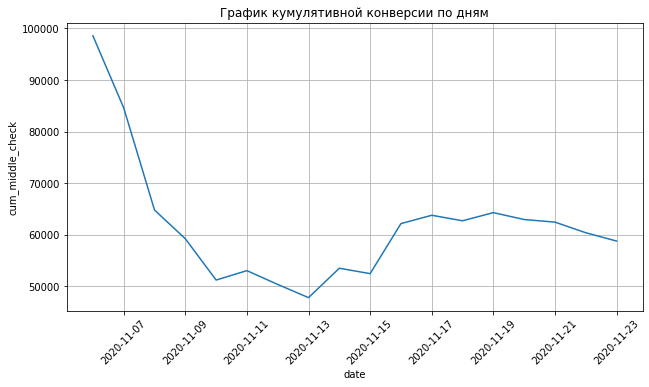

In [48]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_middle_check', data=sample_data_a, ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

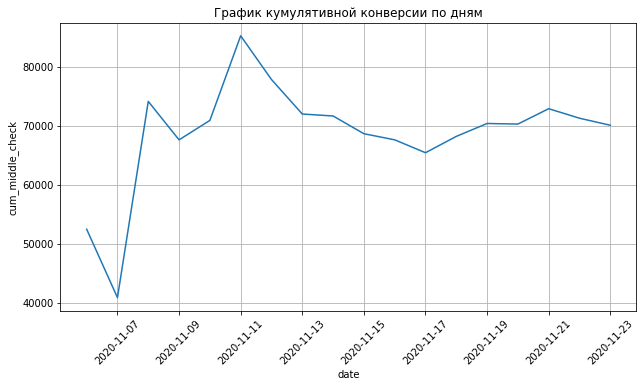

In [49]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_middle_check', data=sample_data_b, ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

In [24]:
ab_merged = sample_data_a.merge(
    sample_data_b,
    on='date',
    how='left'
)
display(ab_merged.head())

,date,Количество посетителей_x,Количество транзакций_x,Сумма покупок_x,Коммулятивное количество посетителей_x,Коммулятивное количество транзакций_x,Коммулятивная сумма покупок_x,cum_middle_check_x,cum_conversion_x,Количество посетителей_y,Количество транзакций_y,Сумма покупок_y,Коммулятивное количество посетителей_y,Коммулятивное количество транзакций_y,Коммулятивная сумма покупок_y,cum_middle_check_y,cum_conversion_y
0,2020-11-06,2576,16,1577279,2576,16,1577279,98579.937500,0.621118,2499,19,996645,2499,19,996645,52455.000000,0.760304
1,2020-11-07,2704,23,1721886,5280,39,3299165,84593.974359,0.738636,2804,19,555499,5303,38,1552144,40845.894737,0.716576
2,2020-11-08,3354,25,846051,8634,64,4145216,64769.000000,0.741256,3291,24,3044842,8594,62,4596986,74144.935484,0.721434
3,2020-11-09,3234,18,708830,11868,82,4854046,59195.682927,0.690934,3062,25,1285836,11656,87,5882822,67618.643678,0.746397
4,2020-11-10,3022,29,826984,14890,111,5681030,51180.450450,0.745467,3072,30,2414726,14728,117,8297548,70919.213675,0.794405
